In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('STUDENT.csv')

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 35 columns):
id             1044 non-null int64
InitialName    1044 non-null object
school         992 non-null object
sex            1044 non-null object
age            971 non-null float64
address        1044 non-null object
famsize        1044 non-null object
Pstatus        1044 non-null object
Medu           1044 non-null int64
Fedu           1044 non-null int64
Mjob           1044 non-null object
Fjob           1044 non-null object
reason         428 non-null object
guardian       1044 non-null object
traveltime     1044 non-null int64
studytime      1044 non-null int64
failures       1044 non-null int64
schoolsup      1044 non-null object
famsup         1044 non-null object
paid           1044 non-null object
activities     1044 non-null object
nursery        1044 non-null object
higher         1044 non-null object
internet       1044 non-null object
romantic       1044 non-null object
f

In [4]:
# Task 1.1
df['G3'].value_counts()

PASS    661
FAIL    383
Name: G3, dtype: int64

In [5]:
# Task 1.2
def preprocess():
    import pandas as pd
    #Preprocess data
    df_raw = pd.read_csv('STUDENT.csv', index_col=0)
    df = df_raw.drop(['InitialName', 'guardian'], axis=1)
    
    #Map binaries
    df['address'] = df['address'].map({ 'U':0, 'R':1 })
    df['sex'] = df['sex'].map({ 'M':0, 'F':1 })
    df['famsize'] = df['famsize'].map({ 'LE3':0, 'GT3':1 })
    df['Pstatus'] = df['Pstatus'].map({ 'A':0, 'T':1 })
    df['schoolsup'] = df['schoolsup'].map({ 'no':0, 'yes':1 })
    df['famsup'] = df['famsup'].map({ 'no':0, 'yes':1 })
    df['paid'] = df['paid'].map({ 'no':0, 'yes':1 })
    df['activities'] = df['activities'].map({ 'no':0, 'yes':1 })
    df['nursery'] = df['nursery'].map({ 'no':0, 'yes':1 })
    df['higher'] = df['higher'].map({ 'no':0, 'yes':1 })
    df['internet'] = df['internet'].map({ 'no':0, 'yes':1 })
    df['romantic'] = df['romantic'].map({ 'no':0, 'yes':1 })
    df['G3'] = df['G3'].map({ 'FAIL': 0, 'PASS': 1 })

    #Fill via median for age
    df['age'].fillna(df['age'].median(), inplace=True)
    
    #Fill via 'none' since hot encode will flag
    df['school'].fillna('none', inplace=True)
    df['reason'].fillna('none', inplace=True)

    #Drop g1 & 2 empty rows
    df = df.drop(['G1', 'G2', 'failures'], axis=1)
    #cols_miss_drop =['G1', 'G2']
    #mask = pd.isnull(df['G1'])
    #for col in cols_miss_drop:
    # mask = mask | pd.isnull(df[col])
    #df = df[~mask]

    #Hot encode
    df = pd.get_dummies(df)
    return df

In [6]:
def analyse_feature_importance(dm_model, feature_names, n_to_display=20):
    # grab feature importances from the model
    importances = dm_model.feature_importances_

    # sort them out in descending order
    indices = np.argsort(importances)
    indices = np.flip(indices, axis=0)
    # limit to 20 features, you can leave this out to print out everything
    indices = indices[:n_to_display]
    for i in indices:
        print(feature_names[i], ':', importances[i])
        
def visualize_decision_tree(dm_model, feature_names, save_name):
    dotfile = StringIO()
    export_graphviz(dm_model, out_file=dotfile, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dotfile.getvalue())
    graph[0].write_png(save_name) # saved in the following file

In [7]:
df = preprocess()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 1043
Data columns (total 43 columns):
sex                  1044 non-null int64
age                  1044 non-null float64
address              1044 non-null int64
famsize              1044 non-null int64
Pstatus              1044 non-null int64
Medu                 1044 non-null int64
Fedu                 1044 non-null int64
traveltime           1044 non-null int64
studytime            1044 non-null int64
schoolsup            1044 non-null int64
famsup               1044 non-null int64
paid                 1044 non-null int64
activities           1044 non-null int64
nursery              1044 non-null int64
higher               1044 non-null int64
internet             1044 non-null int64
romantic             1044 non-null int64
famrel               1044 non-null int64
freetime             1044 non-null int64
goout                1044 non-null int64
Dalc                 1044 non-null int64
Walc                 1044 non-

In [8]:
df['higher'].value_counts()

1    955
0     89
Name: higher, dtype: int64

In [9]:
df['school_none'].value_counts()

0    992
1     52
Name: school_none, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

y = df['G3']
x = df.drop(['G3'], axis=1)

#set seed for randomisation
rs = 10

#Convert x into numpy matrix for sklearn consumption
x_mat = x.as_matrix()
#Setup training and test datasets on a 70/30 split
x_train, x_test, y_train, y_test = train_test_split(x_mat, y, test_size=0.3, stratify=y, random_state=rs)

#simple decision tree training
model = DecisionTreeClassifier(random_state=rs)
model.fit(x_train, y_train)

#Check accuracy on the training sets
print("Train accuracy:", model.score(x_train, y_train))
#Check accuracy on the test sets
print("Test accuracy:", model.score(x_test, y_test))

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

#Check which features have the largest impact on the decision tree?
import numpy as np

#grab feature importances from the model and feature name from the original x
importances = model.feature_importances_
feature_names = x.columns

#sort in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

#limit to 20 features
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', importances[i])

Train accuracy: 0.9972602739726028
Test accuracy: 0.589171974522293
             precision    recall  f1-score   support

          0       0.45      0.50      0.47       115
          1       0.69      0.64      0.66       199

avg / total       0.60      0.59      0.59       314

absences : 0.09560916279923631
higher : 0.06658724391357355
age : 0.06262717342173142
Fedu : 0.05760027257597375
traveltime : 0.043278515973278565
freetime : 0.042289114645506304
famrel : 0.041627954427609797
goout : 0.040205962439106256
health : 0.038198143545094314
reason_home : 0.03687757908823
famsup : 0.036806554546183756
Medu : 0.035631807393326664
studytime : 0.0338949196526395
sex : 0.0272595931558402
school_DCHS : 0.026589526320946126
Dalc : 0.025552026252349605
Walc : 0.0235540199840252
internet : 0.022752062565688812
paid : 0.021111823615985976
Mjob_at_home : 0.019885283725948007


C:\Users\rickm\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


In [11]:
import pydot
from io import StringIO
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
from sklearn.tree import export_graphviz
# visualize
dotfile = StringIO()
export_graphviz(model, out_file=dotfile, feature_names=x.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("default_decision.png") # saved in the following file - will return True if successful

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
# grid search CV
params = {'criterion': ['gini', 'entropy'],
 'max_depth': range(2, 10),
 'min_samples_leaf': range(20, 60, 10)}
cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs),cv=10)
cv.fit(x_train, y_train)
print("Train accuracy:", cv.score(x_train, y_train))
print("Test accuracy:", cv.score(x_test, y_test))
# test the best model
y_pred = cv.predict(x_test)
print(classification_report(y_test, y_pred))
# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.7219178082191781
Test accuracy: 0.6592356687898089
             precision    recall  f1-score   support

          0       0.54      0.50      0.52       115
          1       0.72      0.75      0.74       199

avg / total       0.65      0.66      0.66       314

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 30}


In [14]:
# grid search CV
params = {'criterion': ['gini', 'entropy'],
 'max_depth': range(2, 10),
 'min_samples_leaf': range(24, 37)}
cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs),cv=10)
cv.fit(x_train, y_train)
print("Train accuracy:", cv.score(x_train, y_train))
print("Test accuracy:", cv.score(x_test, y_test))
# test the best model
y_pred = cv.predict(x_test)
print(classification_report(y_test, y_pred))
# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.7178082191780822
Test accuracy: 0.643312101910828
             precision    recall  f1-score   support

          0       0.51      0.51      0.51       115
          1       0.72      0.72      0.72       199

avg / total       0.64      0.64      0.64       314

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 34}


In [15]:
analyse_feature_importance(cv.best_estimator_, x.columns, 20)

higher : 0.3133028333660085
school_DCHS : 0.131807588885754
absences : 0.11448145286961198
Fedu : 0.1088873310214518
traveltime : 0.07112199333165148
Walc : 0.06600140937787094
goout : 0.05600878017323428
Medu : 0.05347658470638005
paid : 0.043082687834854506
Fjob_services : 0.04182933843318245
activities : 0.0
romantic : 0.0
internet : 0.0
nursery : 0.0
reason_reputation : 0.0
famsup : 0.0
famrel : 0.0
studytime : 0.0
Pstatus : 0.0
famsize : 0.0


In [16]:
visualize_decision_tree(cv.best_estimator_, x.columns, "optimal_decision.png")

In [17]:
#
#
# Start of regression
#
#

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
# Scale all data to have a mean of 0
x_train_scaler = scaler.fit_transform(x_train, y_train)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model = LogisticRegression(random_state=rs)
# fit it to training data
model.fit(x_train_scaler, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=10, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
# training and test accuracy
print("Train accuracy:", model.score(x_train_scaler, y_train))
print("Test accuracy:", model.score(x_test, y_test))
# classification report on test data
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.7342465753424657
Test accuracy: 0.3662420382165605
             precision    recall  f1-score   support

          0       0.37      1.00      0.54       115
          1       0.00      0.00      0.00       199

avg / total       0.13      0.37      0.20       314



C:\Users\rickm\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [23]:
feature_names = x.columns
coef = model.coef_[0]
# limit to 20 features, you can comment the following line to print out everything
coef = coef[:20]
for i in range(len(coef)):
    print(feature_names[i], ':', coef[i])

sex : 0.2431274764602015
age : -0.26578375258821146
address : -0.004342089777775582
famsize : -0.061954211352185325
Pstatus : -0.05565581730388714
Medu : 0.1737062742216046
Fedu : 0.3335076804114587
traveltime : -0.0935315069961461
studytime : 0.2802068924590801
schoolsup : -0.3552837191624801
famsup : -0.21740670296107673
paid : -0.20041959509309853
activities : 0.011872225521872065
nursery : -0.0750086382071716
higher : 0.36049854887312976
internet : 0.042183867408176486
romantic : -0.14827023611725745
famrel : 0.14398854136151648
freetime : -0.08946854746848248
goout : -0.0476429877690482


In [45]:
# grab feature importances from the model and feature name from the original X
coef = model.coef_[0]
feature_names = x.columns
# sort them out in descending order
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)
# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]
for i in indices:
    print(feature_names[i], ':', coef[i])

higher : 0.36049854887312976
schoolsup : -0.3552837191624801
Fedu : 0.3335076804114587
studytime : 0.2802068924590801
age : -0.26578375258821146
absences : -0.26574362828873427
sex : 0.2431274764602015
famsup : -0.21740670296107673
paid : -0.20041959509309853
school_THS : -0.18128806217421284
Medu : 0.1737062742216046
school_DCHS : 0.17076209462230546
Walc : -0.1641437185405883
Fjob_health : -0.1526297769099963
romantic : -0.14827023611725745
famrel : 0.14398854136151648
reason_other : 0.13591318978510697
reason_course : -0.12386815576199112
Fjob_services : -0.11221469068465104
reason_home : -0.09790106141375353


In [25]:
# grid search CV
params = {'C': [pow(10, x) for x in range(-8, 6)]}
# use all cores to tune logistic regression with C parameter
cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs),cv=10, n_jobs=-1)
cv.fit(x_train, y_train)
# test the best model
print("Train accuracy:", cv.score(x_train_scaler, y_train))
print("Test accuracy:", cv.score(x_test, y_test))
y_pred = cv.predict(x_test)
print(classification_report(y_test, y_pred))
# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.7
Test accuracy: 0.6942675159235668
             precision    recall  f1-score   support

          0       0.62      0.43      0.51       115
          1       0.72      0.84      0.78       199

avg / total       0.68      0.69      0.68       314

{'C': 0.1}


In [58]:
print(cv.best_estimator_.coef_[0])
coef = cv.best_estimator_.coef_[0]
feature_names = x.columns

# sort them out in descending order
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', coef[i])

[ 0.18400567  0.23587738 -0.14121384 -0.16167532  0.46991921 -0.04845438
 -0.22855834 -0.186478    0.25460819 -0.12455669]
Pstatus : 0.46991920723598274
studytime : 0.25460819154306263
age : 0.2358773808817009
Fedu : -0.22855833630512057
traveltime : -0.18647799582841912
sex : 0.18400567157177442
famsize : -0.16167531778557545
address : -0.1412138359257342
schoolsup : -0.12455669070286575
Medu : -0.04845438225170262


In [27]:
#
# Only able to be done on continous I think??
#
import seaborn as sns
import matplotlib.pyplot as plt
def plot_skewed_columns(df):
    # setting up subplots for easier visualisation
    f, axes = plt.subplots(1,2, figsize=(10,10), sharex=False)
    # gift avg plots
    sns.distplot(df['age'].dropna(), hist=False, ax=axes[0])
    sns.distplot(df['absences'].dropna(), hist=False, ax=axes[1])
    plt.show()

plot_skewed_columns(df)

<Figure size 1000x1000 with 2 Axes>

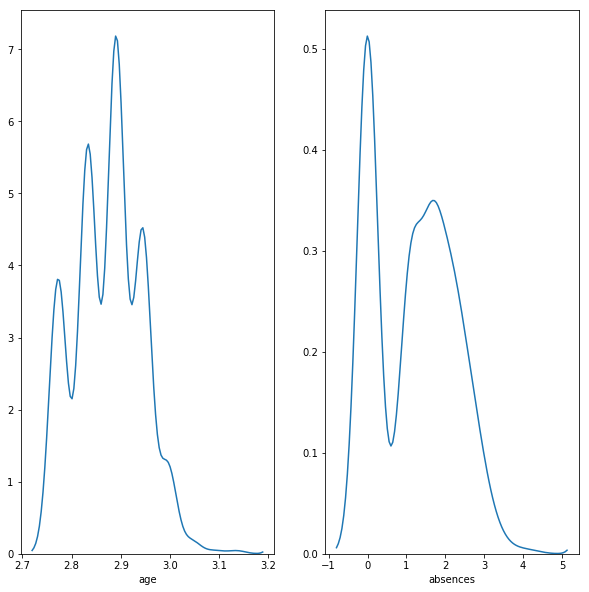

In [28]:
import numpy as np
# list columns to be transformed
columns_to_transform = ['absences', 'age']
# copy the dataframe
df_log = df.copy()
# transform the columns with np.log
for col in columns_to_transform:
    df_log[col] = df_log[col].apply(lambda x: x+1)
    df_log[col] = df_log[col].apply(np.log)
# plot them again to show the distribution
plot_skewed_columns(df_log)

In [29]:
y_log = df_log['G3']
x_log = df_log.drop(['G3'], axis=1)
x_mat_log = x_log.as_matrix()
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(x_mat_log, y_log, test_size=0.3, 
                                                                    stratify=y_log, random_state=rs)
# standardise them again
scaler_log = StandardScaler()
x_train_log = scaler_log.fit_transform(x_train_log, y_train_log)
x_test_log = scaler_log.transform(x_test_log)

C:\Users\rickm\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}
cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs),
cv=10, n_jobs=-1)
cv.fit(x_train_log, y_train_log)

# test the best model
print("Train accuracy:", cv.score(x_train_log, y_train_log))
print("Test accuracy:", cv.score(x_test_log, y_test_log))

y_pred = cv.predict(x_test_log)
print(classification_report(y_test_log, y_pred))

# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.7315068493150685
Test accuracy: 0.6719745222929936
             precision    recall  f1-score   support

          0       0.57      0.43      0.49       115
          1       0.71      0.81      0.76       199

avg / total       0.66      0.67      0.66       314

{'C': 0.01}


In [31]:
#
# Log made it worse
#

In [32]:
# Task 3.3

In [33]:
from sklearn.feature_selection import RFECV
rfe = RFECV(estimator = LogisticRegression(random_state=rs), cv=10)
rfe.fit(x_train, y_train) # run the RFECV
# comparing how many variables before and after
print("Original feature set", x_train.shape[1])
print("Number of features after elimination", rfe.n_features_)

Original feature set 42
Number of features after elimination 29


In [34]:
x_train_sel = rfe.transform(x_train)
x_test_sel = rfe.transform(x_test)

In [35]:
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}
cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs),
cv=10, n_jobs=-1)
cv.fit(x_train_sel, y_train)
# test the best model
print("Train accuracy:", cv.score(x_train_sel, y_train))
print("Test accuracy:", cv.score(x_test_sel, y_test))
y_pred = cv.predict(x_test_sel)
print(classification_report(y_test, y_pred))
# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.7219178082191781
Test accuracy: 0.6751592356687898
             precision    recall  f1-score   support

          0       0.58      0.40      0.47       115
          1       0.71      0.83      0.76       199

avg / total       0.66      0.68      0.66       314

{'C': 0.1}


In [36]:
# running RFE + log transformation
rfe = RFECV(estimator = LogisticRegression(random_state=rs), cv=10)
rfe.fit(x_train_log, y_train_log) # run the RFECV on log transformed dataset
# comparing how many variables before and after
print("Original feature set", x_train_log.shape[1])
print("Number of features after elimination", rfe.n_features_)
# select features from log transformed dataset
x_train_sel_log = rfe.transform(x_train_log)
x_test_sel_log = rfe.transform(x_test_log)
# init grid search CV on transformed dataset
params = {'C': [pow(10, x) for x in range(-6, 4)]}
cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs),
cv=10, n_jobs=-1)
cv.fit(x_train_sel_log, y_train_log)
# test the best model
print("Train accuracy:", cv.score(x_train_sel_log, y_train_log))
print("Test accuracy:", cv.score(x_test_sel_log, y_test_log))
y_pred_log = cv.predict(x_test_sel_log)
print(classification_report(y_test_log, y_pred_log))
# print parameters of the best model
print(cv.best_params_)

Original feature set 42
Number of features after elimination 17
Train accuracy: 0.7178082191780822
Test accuracy: 0.6878980891719745
             precision    recall  f1-score   support

          0       0.60      0.43      0.51       115
          1       0.72      0.83      0.77       199

avg / total       0.68      0.69      0.67       314

{'C': 0.01}


In [37]:
#
# RFE + log is better than RFE or log but original is better than both
#

In [38]:
# similar parameters with the last practical
params = {'criterion': ['gini', 'entropy'],
'max_depth': range(3, 9),
'min_samples_leaf': range(25, 45)}
cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(x_train_log, y_train_log)
print(cv.best_params_)

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 34}


In [39]:
from sklearn.feature_selection import SelectFromModel
# use the trained best decision tree from GridSearchCV to select features
# supply the prefit=True parameter to stop SelectFromModel to re-train the model
selectmodel = SelectFromModel(cv.best_estimator_, prefit=True)
x_train_sel_model = selectmodel.transform(x_train_log)
x_test_sel_model = selectmodel.transform(x_test_log)
print(x_train_sel_model.shape)

(730, 10)


In [40]:
analyse_feature_importance(cv.best_estimator_, x_log.columns)

higher : 0.3133028333660085
school_DCHS : 0.131807588885754
absences : 0.11448145286961198
Fedu : 0.1088873310214518
traveltime : 0.07112199333165148
Walc : 0.06600140937787094
goout : 0.05600878017323428
Medu : 0.05347658470638005
paid : 0.043082687834854506
Fjob_services : 0.04182933843318245
activities : 0.0
romantic : 0.0
internet : 0.0
nursery : 0.0
reason_reputation : 0.0
famsup : 0.0
famrel : 0.0
studytime : 0.0
Pstatus : 0.0
famsize : 0.0


In [41]:
params = {'C': [pow(10, x) for x in range(-6, 4)]}
cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs),
cv=10, n_jobs=-1)
cv.fit(x_train_sel_model, y_train_log)
print("Train accuracy:", cv.score(x_train_sel_model, y_train_log))
print("Test accuracy:", cv.score(x_test_sel_model, y_test_log))
# test the best model
y_pred = cv.predict(x_test_sel_model)
print(classification_report(y_test_log, y_pred))
# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.7082191780821918
Test accuracy: 0.6910828025477707
             precision    recall  f1-score   support

          0       0.66      0.32      0.43       115
          1       0.70      0.90      0.79       199

avg / total       0.68      0.69      0.66       314

{'C': 1}


In [42]:
#
# Still not as good as just normal
#

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'